## Implémentation et test 

### Implémentation 



In [1]:
import numpy as np



def getCoordFromVect(idx:int,nbSide:int)-> np.ndarray:
    '''
    renvoie les coordonnées du pixel en fonction de 
    son indice dans un tableau 1D 
    --------------------------
    idx : index dand le tableau 1D
    nbSide : nombre de pixel sur le coté de l image carrée
    '''
    x = idx//(nbSide)
    y = idx%(nbSide)
    return np.array([x,y]) 
    
def getIdxFromArray(i:int,j:int,nbSide:int)->int:
    '''
    renvoie l'index du pixel dont les coordonnées sont 
    i et j 
    --------------------------
    i,j : coordonnées
    nbSide : nombre de pixel sur le coté de l image carrée
    '''
    return i*nbSide+ j 
    
    
### Fonction getVoisins(d) : retourne un liste de voisins
def getVoisins(idx:int,nbSide:int,d:int):
    '''
    renvoie la liste des indices voisins de idx
    ----------------------
    idx: index du pixel dans un vecteur 1D
    nbSide: nombre de pixel de coté 
    d : distance du plus grand voisins '''
    
    #Coordonnées du centre
    Cx,Cy = getCoordFromVect(idx,nbSide)
    #Coordonnées de l'origine
    Ox = Cx-d
    Oy = Cy-d
    voisins = []
    for x in range(Ox,Ox+2*d+1):
        for y in range(Oy,Oy+2*d+1):

            # Valeurs dans la grille ? 
            if ((x>=0 and x<nbSide) and (y>=0 and y <nbSide)):
                voisins.append([x,y])
    
    return np.array(voisins)
    

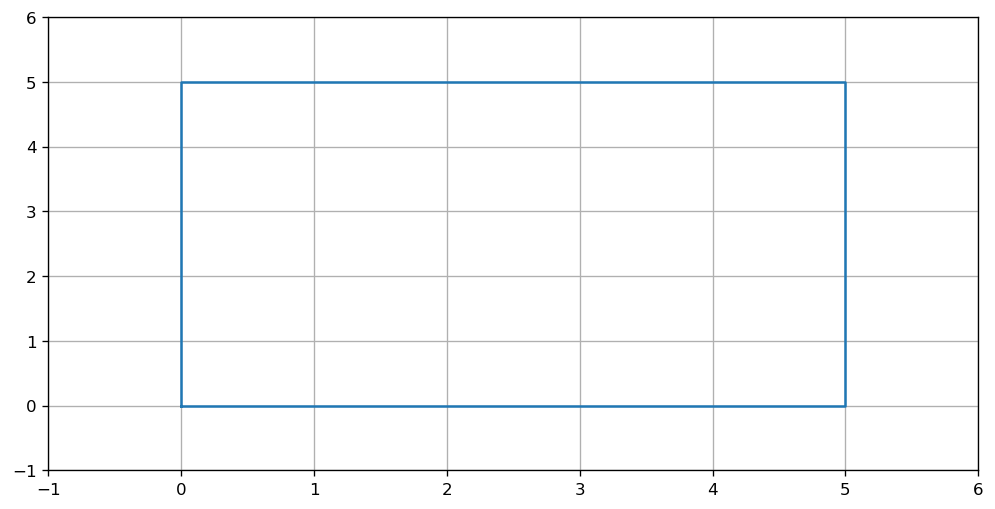

In [12]:
### Test sur grille 6*6
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 120

plt.xlim(-1,6)
plt.ylim(-1,6)
plt.grid()
plt.plot([0,0,5,5,0],[0,5,5,0,0])
plt.show()


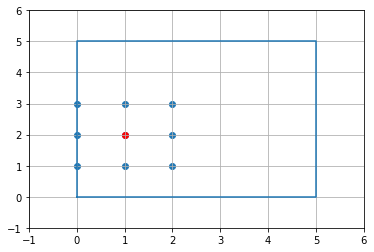

In [3]:
plt.xlim(-1,6)
plt.ylim(-1,6)
plt.grid()
plt.plot([0,0,5,5,0],[0,5,5,0,0])

nbSide=5
idx = 11
d = 1
x_c,y_c = getCoordFromVect(idx,nbSide)
coo = getVoisins(idx,nbSide,d)

plt.scatter(coo[:,1],coo[:,0])
plt.scatter(y_c,x_c,color='r')

plt.show()

### OK 



In [3]:
import ImageProcessing.processing as pr

imgPath = imagePath = "data/19_Droit.jpg"

#Utilisation du paquet
img =pr.cropToCoin(imgPath)
contours = pr.getContour(img)

plt.imshow(contours)
plt.show()



NameError: name 'plt' is not defined

In [5]:
def getVoisins(idx:int,nbSide:int,d:int):
    '''
    renvoie la liste des indices voisins de idx
    ----------------------
    idx: index du pixel dans un vecteur 1D
    nbSide: nombre de pixel de coté 
    d : distance du plus grand voisins '''
    
    #Coordonnées du centre
    Cx,Cy = getCoordFromVect(idx,nbSide)
    #Coordonnées de l'origine
    Ox = Cx-d
    Oy = Cy-d
    voisins = []
    for x in range(Ox,Ox+2*d+1):
        for y in range(Oy,Oy+2*d+1):

            # Valeurs dans la grille ? 
            if ((x>=0 and x<nbSide) and (y>=0 and y <nbSide)):
                voisins.append([x,y])
                
    nb = len(voisins)
    idxVoisins = np.zeros(nb)
    
    for coord in range(nb):
        i,j = voisins[coord]
        idxVoisins[coord] = getIdxFromArray(i,j,nbSide)
    
    return idxVoisins


def RBF(a:np.ndarray,b:np.ndarray,l:float):
    xa,ya = a
    xb,yb = b
    d2 = (xa-xb)**2 + (ya-yb)**2
    return np.exp(-d2/(2*l**2))

In [6]:
from scipy import sparse as s
import time

def getK(nbSide:int,l:float)-> s.lil.lil_matrix:
    d = int(np.floor(3*l))
    N = nbSide*nbSide
    M = s.lil_matrix((N,N))
    

    for i in range(N):
        voisins = getVoisins(i,nbSide,d)
        x = getCoordFromVect(i,nbSide)
        for j in voisins:
            y = getCoordFromVect(j,nbSide)
            M[i,j] = RBF(x,y,l)

    return M
    
    

In [62]:
lListe = [4]

dtListe = []
dataListe = []

nbSide,b = np.shape(contours)


for l in lListe:
    start = time.time()
    
    K  = getK(nbSide,l)
    
    dt = time.time() -start
    print("dt(l= %f) : "%l,dt)
    print("data(l= %f) : "%l,K.data.nbytes)
    
    dtListe.append(dt)
    dataListe.append(K.data.nbytes)
     




dt :  2339.8301169872284
dt(l= 4.000000) :  2341.8878881931305
data(l= 4.000000) :  1036800


In [2]:
#Calcul avec l/2 =2.5 => l=5

shape = np.shape(contours)

#Vecteur de poids
weightVec = contours.ravel()

W = s.diags(weightVec)
Kw = (K.transpose()).dot(W).dot(K)
varVect = Kw.diagonal()


NameError: name 'contours' is not defined

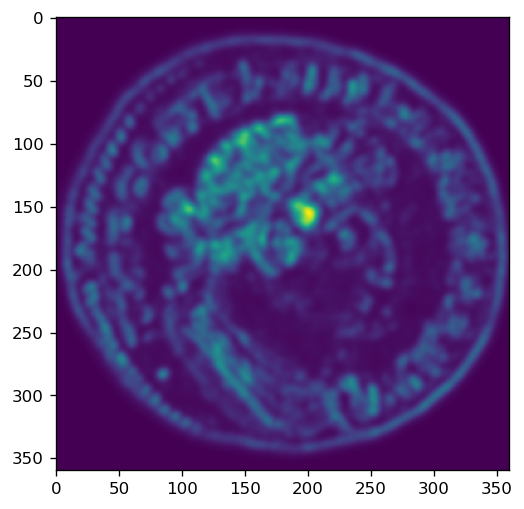

In [64]:
varMap = np.reshape(varVect,shape)
plt.imshow(varMap)

In [1]:
### comparaison avec originale
l= 8

from FeaturesExtractor.misc import *
from FeaturesExtractor import Kernel as k

threshold = 1000

Xvec = XVecFromArray(contours)
ker = k.Kernel(weightVec,Xvec,l,threshold)

varVect = ker.getVarVector()

varMapO = np.reshape(varVect,shape)

NameError: name 'contours' is not defined

In [ ]:
plt.imshow(varMapO)